# 12. Logistic Regression pada Binary Classification Task

Referensi: https://en.wikipedia.org/wiki/Logistic_regression

## Formula Dasar

### Simple Linear Regression

- $ y= \alpha + \beta x$
- $ g(x) = \alpha + \beta x$

### Multiple Linear Regression

- $ y = \alpha + \beta_1 x_1 + \beta 1 x_1 + ... + \beta_n x_n$
- $ g(X) = \alpha + \beta X $

### Logistic Regression

- $ g(X) = sigmoid (\alpha +\beta X)$
- $ sigimoid(x) = \frac {1} {1+exp(-x)}$

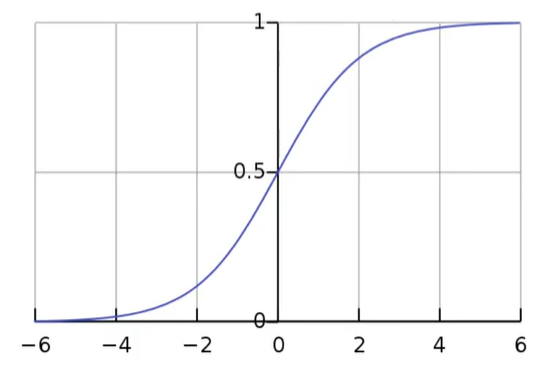

bila model logistic regression divisualisasikan maka akan membentuk kurva sigmoid seperti gambar diatas (angka pada sumbu x disana hanya sebagai contoh saja tetapi pada sumbu y akan selalu pada rentang 0 dan 1 dan selalu dengan binominal probability)

## Dataset: SMS Spam Collection Data Set

- Sumber Data: 
https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection 
- Alternative link bila data sulit di akses:
https://github.com/MarkvinsonAvatara/Machine_Learning_Python_With_Scikit_Learn/tree/main/Datasets

In [4]:
import pandas as pd
df = pd.read_csv('./Datasets/SMSSpamCollection',
                 sep='\t', 
                 header=None,
                 names=['label', 'sms']) # sep= seperator, names = untuk mengatur nama kolom
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Training & Testing Dataset

In [7]:
from sklearn.preprocessing import LabelBinarizer

x = df['sms'].values
y = df['label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

array(['ham', 'spam'], dtype='<U4')

note:
- LabelBinalizer befungsi untuk menkonversi data menjadi nilai biner 0 dan 1
- .ravel() ada untuk menkonversi suatu array kembali menjadi satu dimensi

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

print(x_train, '\n')
print(y_train)

['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] 

[0 1 0 ... 1 0 0]


## Feature Extraction dengan TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print(x_train_tfidf)

  (0, 6903)	0.3591386422223876
  (0, 2006)	0.2898082580285881
  (0, 900)	0.4114867709157148
  (0, 6739)	0.3546359942830148
  (0, 2554)	0.3825278811525034
  (0, 3926)	0.3126721340000456
  (0, 4453)	0.2297719954323795
  (0, 5123)	0.308974289326673
  (0, 3007)	0.21421364306658514
  (0, 2997)	0.23173982975834367
  (1, 36)	0.28902673040368515
  (1, 1548)	0.18167737976542422
  (1, 2003)	0.2711077935907125
  (1, 5301)	0.2711077935907125
  (1, 4358)	0.17341410292348694
  (1, 532)	0.20186022353306565
  (1, 6131)	0.16142609035094446
  (1, 5394)	0.16464655071448758
  (1, 4677)	0.24039776602646504
  (1, 216)	0.28902673040368515
  (1, 6013)	0.20089911182610476
  (1, 6472)	0.24039776602646504
  (1, 5441)	0.5009783758205715
  (1, 799)	0.25048918791028574
  (1, 5642)	0.24344998442301355
  :	:
  (4176, 343)	0.2811068572055718
  (4176, 107)	0.29968668460649284
  (4176, 2004)	0.25589560236817055
  (4176, 4350)	0.29968668460649284
  (4176, 637)	0.29968668460649284
  (4176, 7114)	0.4512018097459442
  (4176

## Binary Classification dengan Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf)

for pred, sms in zip(y_pred[:5], x_test[:5]):
    print(f'PRED: {pred} - SMS: {sms}\n')

PRED: 0 - SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@

PRED: 0 - SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.

PRED: 0 - SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed

PRED: 0 - SMS: Sir Goodmorning, Once free call me.

PRED: 0 - SMS: All will come alive.better correct any good looking figure there itself..



## Evaluation Metrics pada Binary Classification

Terdiri dari: 

- Confusion Matrix 
- Accuracy
- Precission & Recall
- F1 Score
- ROC

### Termonologi Dasar

- True Positive (TP) =  sesuatu yang bernilai positif telah dengan tepat diprediksi sebagi positif oleh model
- True Negative (TN) =  sesuatu yang bernilai negatif telah dengan tepat diprediksi sebagi negatif oleh model
- False Positive (FP) = sesuatu yang bernilai negatif telah keliru diprediksi sebagi postif oleh model
- False Negative (FN) = sesuatu yang bernilai postif telah keliru diprediksi sebagi negatif oleh model

## Confusion Matrix

Confusion Matrix atau Error Matrix berperan untuk menampilkan nilai TN, FP, FN, dan TP

Referensi: https://en.wikipedia.org/wiki/Confusion_matrix

In [14]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix
#note ini masih bentuk array 2 dimensi

array([[1207,    1],
       [  48,  137]], dtype=int64)

In [12]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 1207
FP: 1
FN: 48
TP: 137


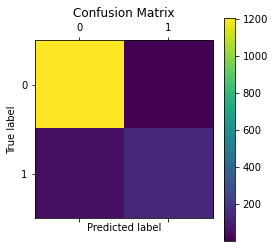

In [13]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Accuracy

Accuracy mengukur porsi dari hasil prediksi yang tepat

$ Accuracy = \frac {TP+TN}{TP+TN+FP+TN} = \frac {correct}{total} $

Referensi: https://en.wikipedia.org/wiki/Accuracy_and_precision

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.964824120603015

## Precission & Recall

Selain menggunakan accuracy, performa dari suatu classifier umumnya juga diukur berdasarkan nilai Precission dan Recall.

Referensi: https://en.wikipedia.org/wiki/Precision_and_recall

#### _Precission or Positive Predictive Value (PPV)_

$ Precission = \frac {TP}{TP+FP}$

Referensi: https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values

In [16]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.9927536231884058

#### _Recall or True Positive Rate (TPR) or Sensitivity_

$ Recall = \frac {TP}{TP+FN}$

Referensi: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In [17]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7405405405405405

## F1-Score

F1-score atau F1-measure adalah harmonic mean dari precission dan recall.

$ F1 score = \frac {precission x recall} {precission + recall}$

Referensi: https://en.wikipedia.org/wiki/F-score

In [18]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8482972136222909

## ROC: Receiver Operating Characteristic

ROC menawarkan visualisasi terhadap performa dari classifier dengan membandingkan nilai Recall (TPR) dan nilai Fallout (FPR)



$fallout = \frac {FP}{TN+FP}$

Referensi: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

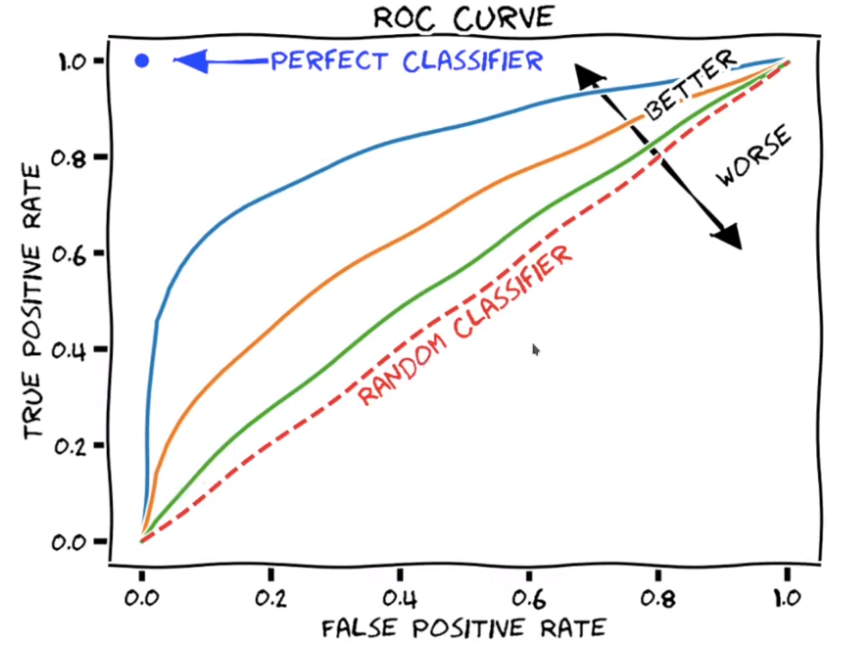

note: 
- biru merupakan performa terbaik
- orange merupakan performa menengah
- hijau merupakan performa terburuk

Ketika hasil plotting dari suatu model makin mengarah ke kiri atas maka performentnya akan dinilai semakin baik

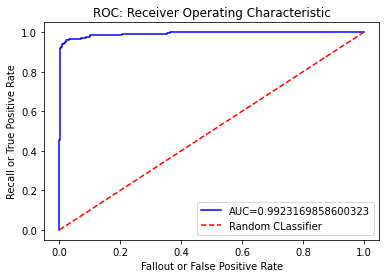

In [20]:
from sklearn.metrics import roc_curve, auc

prob_estimates = model.predict_proba(x_test_tfidf)

fpr, tpr, threshhold = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random CLassifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

source: https://www.youtube.com/watch?v=oe7DW4rSH1o Trs_m